<a href="https://colab.research.google.com/github/Darshan1209/3025_URL/blob/main/Darshan_URL_DecisionTree_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
!pip install wandb

In [8]:
import wandb
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [9]:
run = wandb.init(
    project="URL Dataset",
    # Track hyperparameters and run metadata
    config={
        "learning_rate": 0.01,
        "epochs": 10,
    },
)

In [10]:
data = pd.read_csv('urlset.csv', encoding='latin-1')

In [11]:
data.sample(20)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
15063,paypal.com.usa.cgi.bin.webscr.cmd.login.submit...,10000000.0,0.0,0.0,11.0,152.818182,150.545455,0.000000,0.000000,0.000000,0.000000,0.000000,0.776890,1.0
15432,rekrims.com/PLO5XIde/webscr_prim.php?cmVrcmltc...,10000000.0,0.0,0.0,5.0,87.400000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.853306,1.0
655,limoservicesreviews.com/wp-includes/images/wlw...,10000000.0,0.0,0.0,5.0,125.200000,126.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.837719,1.0
10339,cms.paypal.com.cgi.bin.webscr.cmd.flow.session...,10000000.0,0.0,0.0,14.0,69.642857,62.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.670875,1.0
13068,www.stbcomputer.com/autodesk/components/www.pa...,10000000.0,0.0,0.0,12.0,141.083333,140.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.781530,1.0
7478,www.isassi.it/components/com_user/Consulta_Sod...,10000000.0,0.0,0.0,4.0,23.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629630,1.0
3862,'accounts.craigslist.org.broadway-music.com/cr...,10000000.0,0.0,0.0,5.0,93.200000,88.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.722960,1.0
3364,zc64cpalz.blogspot.com/,11.0,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.513514,0.000000,1.0
9800,institutohemitriassalagil.com.br/plugins/syste...,10000000.0,0.0,0.0,6.0,101.333333,104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.801170,1.0
10534,tinyurl.com/cdkvoqx,656.0,1.0,1.0,2.0,11.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.440000,0.708333,1.0


In [12]:
data.dropna(inplace=True)

In [13]:
crosstab = pd.crosstab([data['mld_res'],data['mld.ps_res'],data['card_rem'],data['ratio_Rrem'],data['ratio_Arem'],data['jaccard_RR'],data['jaccard_RA'],data['jaccard_AR'],data['jaccard_AA'],data['jaccard_ARrd'],data['jaccard_ARrem']],data['label'])
print(crosstab)

label                                                                                                                      1.0
mld_res mld.ps_res card_rem ratio_Rrem ratio_Arem jaccard_RR jaccard_RA jaccard_AR jaccard_AA jaccard_ARrd jaccard_ARrem      
0.0     0.0        0.0      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000     0.000000       1004
                                                                                              0.500000     0.000000          1
                                                                                              0.666667     0.000000          1
                   1.0      0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000     0.000000         13
                            5.000000   4.000000   0.000000   0.000000   0.000000   0.000000   0.000000     0.285714          2
...                                                                                                            

In [14]:
from sklearn import tree

In [15]:
y = data['label']

In [16]:
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
16297    1.0
16298    1.0
16299    1.0
16300    1.0
16301    1.0
Name: label, Length: 16302, dtype: float64

In [17]:
X = data.drop(['domain', 'label'], axis=1)

In [18]:
X

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,10000000.0,1.0,0.0,18.0,107.611111,107.277778,0.000000,0.000000,0.000000,0.000000,0.8,0.795729
1,10000000.0,0.0,0.0,11.0,150.636364,152.272727,0.000000,0.000000,0.000000,0.000000,0.0,0.768577
2,10000000.0,0.0,0.0,14.0,73.500000,72.642857,0.000000,0.000000,0.000000,0.000000,0.0,0.726582
3,10000000.0,0.0,0.0,6.0,562.000000,590.666667,0.000000,0.000000,0.000000,0.000000,0.0,0.859640
4,10000000.0,0.0,0.0,8.0,29.000000,24.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.748971
...,...,...,...,...,...,...,...,...,...,...,...,...
16297,10000000.0,0.0,0.0,11.0,147.181818,145.363636,0.000000,0.000000,0.000000,0.000000,0.0,0.795759
16298,10000000.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
16299,10000000.0,0.0,0.0,13.0,106.538462,106.153846,0.000000,0.000000,0.000000,0.000000,0.0,0.738994
16300,10000000.0,1.0,0.0,6.0,170.333333,180.000000,0.000978,0.000925,0.000978,0.000926,0.5,0.795047


In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
X = X.apply(pd.to_numeric, errors='coerce').dropna()

In [22]:
clf = clf.fit(X,y)

In [23]:
import pydotplus

In [24]:
from IPython.display import Image

In [25]:
dot_data=tree.export_graphviz(clf, feature_names=X.columns,
                              class_names=['1', '0'],
                              filled=True, out_file=None)

In [26]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="entropy = 0.0\\nsamples = 16302\\nvalue = 16302.0", fillcolor="#ffffff"] ;\n}'

In [27]:
graph = pydotplus.graph_from_dot_data(dot_data)

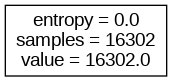

In [28]:
graph
Image(graph.create_png())

In [29]:
testData = [['xbox360.gamespy.com/xbox-360/dead-space/',11812,1,1,3,114,128.333333,0.019718,0.020151,0.011461,0.012788,0.55,0.714623,0],
            ['xbox360.ign.com/objects/850/850402.html',339,1,1,2,142.5,141,0.009009,0.009091,0.006536,0.006601,0.45098,0.846906,0],
            ['games.teamxbox.com/xbox-360/1860/Dead-Space/',63029,1,0,3,114,128.333333,0.002899,0.002577,0.002907,0.002584,0.75,0.714623,0],
            ['www.gamespot.com/xbox360/action/deadspace/',753,1,1,3,91,101.333333,0,0.003106,0,0,0.111111,0.648571,0],
            ['en.wikipedia.org/wiki/Dead_Space_(video_game)',6,1,1,4,682,744.25,0.033075,0.029412,0.03025,0.029145,0.809735,0.840323,0],
            ['www.angelfire.com/goth/devilmaycrytonite/',2547,1,1,5,32.4,27.2,0.022222,0.03268,0.017341,0.020408,0.636364,0.674157,0],
          ]

In [30]:
testData

[['xbox360.gamespy.com/xbox-360/dead-space/',
  11812,
  1,
  1,
  3,
  114,
  128.333333,
  0.019718,
  0.020151,
  0.011461,
  0.012788,
  0.55,
  0.714623,
  0],
 ['xbox360.ign.com/objects/850/850402.html',
  339,
  1,
  1,
  2,
  142.5,
  141,
  0.009009,
  0.009091,
  0.006536,
  0.006601,
  0.45098,
  0.846906,
  0],
 ['games.teamxbox.com/xbox-360/1860/Dead-Space/',
  63029,
  1,
  0,
  3,
  114,
  128.333333,
  0.002899,
  0.002577,
  0.002907,
  0.002584,
  0.75,
  0.714623,
  0],
 ['www.gamespot.com/xbox360/action/deadspace/',
  753,
  1,
  1,
  3,
  91,
  101.333333,
  0,
  0.003106,
  0,
  0,
  0.111111,
  0.648571,
  0],
 ['en.wikipedia.org/wiki/Dead_Space_(video_game)',
  6,
  1,
  1,
  4,
  682,
  744.25,
  0.033075,
  0.029412,
  0.03025,
  0.029145,
  0.809735,
  0.840323,
  0],
 ['www.angelfire.com/goth/devilmaycrytonite/',
  2547,
  1,
  1,
  5,
  32.4,
  27.2,
  0.022222,
  0.03268,
  0.017341,
  0.020408,
  0.636364,
  0.674157,
  0]]

In [31]:
data.columns

Index(['domain', 'ranking', 'mld_res', 'mld.ps_res', 'card_rem', 'ratio_Rrem',
       'ratio_Arem', 'jaccard_RR', 'jaccard_RA', 'jaccard_AR', 'jaccard_AA',
       'jaccard_ARrd', 'jaccard_ARrem', 'label'],
      dtype='object')

In [32]:
testData = pd.DataFrame(testData, columns=data.columns)

In [33]:
testY = testData['label']

In [34]:
testY

0    0
1    0
2    0
3    0
4    0
5    0
Name: label, dtype: int64

In [35]:
testX = testData.drop(['domain', 'label'], axis=1)

In [36]:
testX

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
0,11812,1,1,3,114.0,128.333333,0.019718,0.020151,0.011461,0.012788,0.550000,0.714623
1,339,1,1,2,142.5,141.000000,0.009009,0.009091,0.006536,0.006601,0.450980,0.846906
2,63029,1,0,3,114.0,128.333333,0.002899,0.002577,0.002907,0.002584,0.750000,0.714623
3,753,1,1,3,91.0,101.333333,0.000000,0.003106,0.000000,0.000000,0.111111,0.648571
4,6,1,1,4,682.0,744.250000,0.033075,0.029412,0.030250,0.029145,0.809735,0.840323
5,2547,1,1,5,32.4,27.200000,0.022222,0.032680,0.017341,0.020408,0.636364,0.674157


In [37]:
predY = clf.predict(testX)

In [38]:
predY

array([1., 1., 1., 1., 1., 1.])

In [39]:
testY

0    0
1    0
2    0
3    0
4    0
5    0
Name: label, dtype: int64

In [40]:
predictions = pd.concat([testData['domain'], testData['label'], pd.Series(predY, name="Predicted Class")], axis=1)

In [41]:
predictions

,domain,label,Predicted Class
0,xbox360.gamespy.com/xbox-360/dead-space/,0,1.0
1,xbox360.ign.com/objects/850/850402.html,0,1.0
2,games.teamxbox.com/xbox-360/1860/Dead-Space/,0,1.0
3,www.gamespot.com/xbox360/action/deadspace/,0,1.0
4,en.wikipedia.org/wiki/Dead_Space_(video_game),0,1.0
5,www.angelfire.com/goth/devilmaycrytonite/,0,1.0


In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(testY, predY)

0.0

In [44]:
print("Accuracy on test data is %.2f" % (accuracy_score(testY, predY)*100))

Accuracy on test data is 0.00


In [45]:
wandb.log({"accuracy": accuracy_score(testY, predY)*100})